In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [17]:
data=pd.read_csv(r"C:\Users\DURGESHWARI GAJBE\Downloads\Zoho WorkDrive\Data Scientist Salaries Analysis.csv")

In [18]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [19]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [20]:
data.shape

(3755, 11)

In [21]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [23]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [24]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

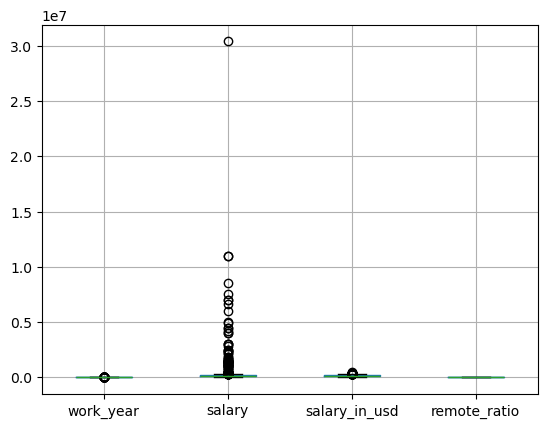

In [25]:
data.boxplot()
plt.show()

In [28]:
 def Ot_treatment(data,col):
    Q1=data[col].quantile(.25)
    Q3=data[col].quantile(.75)
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    UB_Treatment=(data[col]>UB)
    LB_Treatment=(data[col]<LB)
    data.loc[UB_Treatment,col]=data[col].median()
    data.loc[LB_Treatment,col]=data[col].median()
    return data

In [29]:
for i in data.select_dtypes(include=['int64',"float64"]):
    Ot_treatment(data,i)

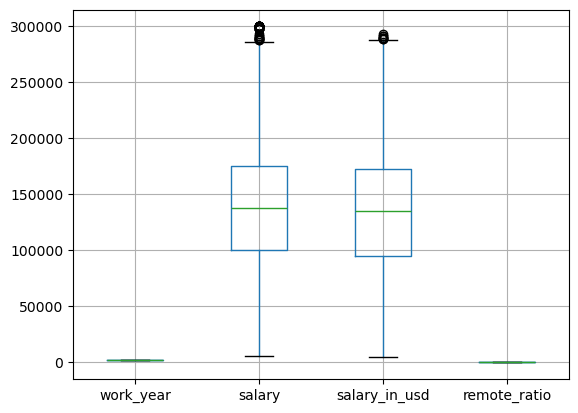

In [30]:
data.boxplot()
plt.show()

In [34]:
from sklearn.preprocessing  import LabelEncoder
LE=LabelEncoder()

In [35]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [36]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [38]:
def CCD(data,col): #CCD (Converting Categorical Data into numrical form so that our ML model can work efficiently )
    data[col]=LE.fit_transform(data[col]) #created a def function CCD for conversion 
    return data

In [39]:
for i in ['experience_level','employment_type','job_title','salary_currency','employee_residence','company_location','company_size']:
    CCD(data,i)

In [40]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [41]:
imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data)

In [42]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

In [44]:
data.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.414115,2.469241,1.996538,39.661784,137138.225033,17.409587,134275.358988,66.149401,46.271638,62.117177,0.918509
std,0.604338,0.906261,0.133550,18.536695,57357.823015,4.062710,57503.697142,19.235212,48.589050,17.495432,0.392071
min,2021.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,5132.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,2.000000,2.000000,27.000000,100000.000000,19.000000,95000.000000,75.000000,0.000000,70.000000,1.000000
50%,2022.000000,3.000000,2.000000,33.000000,138000.000000,19.000000,135000.000000,75.000000,0.000000,70.000000,1.000000
75%,2023.000000,3.000000,2.000000,47.000000,175000.000000,19.000000,172254.500000,75.000000,100.000000,70.000000,1.000000
max,2023.000000,3.000000,3.000000,92.000000,300000.000000,19.000000,293000.000000,77.000000,100.000000,71.000000,2.000000


In [47]:
corr_matrix =data.corr(numeric_only=True)
corr_matrix

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.149965,0.007867,-0.012438,0.183046,0.227850,0.222852,0.219890,-0.244503,0.210946,0.150333
experience_level,0.149965,1.000000,-0.032794,0.020026,0.316280,0.225464,0.361090,0.251325,-0.054025,0.250591,0.066414
employment_type,0.007867,-0.032794,1.000000,-0.052231,0.018908,-0.048446,0.006682,-0.024582,-0.028673,-0.013963,-0.041001
job_title,-0.012438,0.020026,-0.052231,1.000000,0.125767,-0.057072,0.121809,-0.063911,-0.042451,-0.073549,0.002548
salary,0.183046,0.316280,0.018908,0.125767,1.000000,0.423198,0.927495,0.400518,-0.048913,0.394859,-0.015453
salary_currency,0.227850,0.225464,-0.048446,-0.057072,0.423198,1.000000,0.455919,0.755836,-0.046644,0.764744,0.102738
salary_in_usd,0.222852,0.361090,0.006682,0.121809,0.927495,0.455919,1.000000,0.434924,-0.069239,0.425692,0.016673
employee_residence,0.219890,0.251325,-0.024582,-0.063911,0.400518,0.755836,0.434924,1.000000,-0.083142,0.945676,0.032168
remote_ratio,-0.244503,-0.054025,-0.028673,-0.042451,-0.048913,-0.046644,-0.069239,-0.083142,1.000000,-0.071574,-0.036928
company_location,0.210946,0.250591,-0.013963,-0.073549,0.394859,0.764744,0.425692,0.945676,-0.071574,1.000000,0.041703


In [48]:
corr_with_salary = data.corr()["salary"].abs()
relevant_features = corr_with_salary[corr_with_salary > 0.5].index

In [49]:
relevant_features

Index(['salary', 'salary_in_usd'], dtype='object')

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=RandomForestRegressor(),step=1, cv=5, scoring="neg_mean_squared_error")
rfecv.fit(data[relevant_features], data["salary"])

RFECV(cv=5, estimator=RandomForestRegressor(), scoring='neg_mean_squared_error')

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[relevant_features], data["salary"], test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [61]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

49908.97553528616

In [67]:
mae = mean_absolute_error(y_test, y_pred)
mae

57.59246338215703

In [65]:
r2= r2_score(y_test, y_pred)
r2*100

99.9985160974321

In [85]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"n_estimators": [100, 200, 300], "max_depth": [None, 5, 10]}
random_search = RandomizedSearchCV(rf_model, param_grid, cv=5, scoring="neg_mean_squared_error", n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

C:\Users\DURGESHWARI GAJBE\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [90]:
y_pred1 = random_search.predict(X_test)

In [92]:
MAE= mean_absolute_error(y_test, y_pred1)

In [93]:
MAE

57.44095366452887

In [94]:
MSE= mean_squared_error(y_test, y_pred1)

In [95]:
MSE

45283.93344151051